## Analysis of tweets from Uruguayan media press 

# Step 0: Preprocessing

In [ ]:
!pip install textpreprocessing
!pip install clean_stopwords
!pip install langdetect
!pip install --upgrade spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement clean_stopwords (from versions: none)
ERROR: No matching distribution found for clean_stopwords
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 7.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=7c3c8b6dfa5de1fac12dd9558249cffda3ff142083ebf07373c3ef7fabd5c19e
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Step 0. Load libraries and custom modules
# Dataframes and matrices -------------------
import pandas as pd
import numpy as np
import os
# Graphics -------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px
import plotly.io as pio
# Text processors ------------------------------------------------------
import unicodedata
from unicodedata import normalize
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
# Custom functions -----------------------------------------------------
from textpreprocessing import clean_stopwords 
nltk.download('stopwords')
nltk.download('punkt')
import spacy
!python -m spacy download es_core_news_sm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


2022-08-29 22:46:07.078310: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 6.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
df_raw=pd.read_csv('https://raw.githubusercontent.com/abaron32/bases_construidas/main/noticias_uy_twitter.csv', index_col=0)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112237 entries, 3168 to 131673
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      112237 non-null  int64 
 1   text    112237 non-null  object
 2   date    112237 non-null  object
 3   medio   112237 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.3+ MB


In [ ]:
df_raw.reset_index(inplace=True,drop=True)

In [ ]:
pd.set_option('display.max_colwidth', None) #set options pandas

In [ ]:
df_raw.sample(10)

,id,text,date,medio
68617,1535282917777326080,"El incremento rondaría el 10%, según indicó confirmó a El País el presidente del Centro de Industriales Panaderos de Uruguay (CIPU), Álvaro Pena. https://t.co/6JI1mB4mlo",2022-06-10 15:29:06+00:00,el_pais
51773,1515643759983222785,Desde la firma de Lacalle en el antebrazo a la cara de Vázquez: los que llevan la política en la piel https://t.co/6U2hW0RIhZ,2022-04-17 10:50:06+00:00,el_pais
16288,1540209329084702720,Colombia: un sueño que no es quimera. La #postura de Ivonne Calderón. https://t.co/FpxoUhiPT2 https://t.co/awXwOGzgke,2022-06-24 05:44:54+00:00,la_diaria
55918,1520189709997203458,Asesinaron a un hombre de múltiples balazos en Belvedere https://t.co/bub03QDRQ0,2022-04-29 23:54:05+00:00,el_pais
30196,1557497822475321350,#MVDNoticias \n\nEl Partido Nacional celebra sus 186 años. \n\nMóvil de @MarianaAbreu_Ve. https://t.co/sBaftnewSF,2022-08-10 22:43:12+00:00,mvd
96372,1506952075460161536,"Más de la mitad de los niños en Ucrania tuvo que salir de sus casas huyendo de la inseguridad y los combates generados por la invasión del ejército ruso el 24 de febrero, indicó Unicef el jueves. https://t.co/YJ5P1aTrHS",2022-03-24 11:12:27+00:00,telenoche
83673,1556013265632763905,Mundo | El papa Francisco planea su visita a Ucrania en medio de la guerra https://t.co/CnhjbDkRaj https://t.co/iyNs04UyT4,2022-08-06 20:24:06+00:00,el_pais
101044,1527332095713894400,"El secretario de Presidencia, Álvaro Delgado, dijo que el gobierno busca ""reeditar"" esta oportunidad laboral que fue tan bien recibida por la ciudadanía.\n\nhttps://t.co/b4MR9OOJE6",2022-05-19 16:55:22+00:00,telenoche
56930,1521584900398329859,"Susana Giménez hará teatro en Uruguay por primera vez: cuándo, dónde y con quién https://t.co/fnSRkdkYho",2022-05-03 20:18:04+00:00,el_pais
64638,1530512255242190848,"¿Amistad y celos? No solo las parejas, las amistades también pueden ser tóxicas. Vía @eme_elpais https://t.co/BrekQDI7Xv",2022-05-28 11:32:11+00:00,el_pais


In [ ]:
# Check duplicates

data_duplicates = df_raw['id'].duplicated().sum()

print(f'There are {data_duplicates} duplicated tweets in the dataset according to the feature id.')

There are 0 duplicated tweets in the dataset according to the feature id.


In [ ]:
df_interim=df_raw.copy()

In [ ]:
# Change data type of date and medio and drop id

df_interim['date']=df_interim['date'].astype('datetime64')
df_interim['medio']=df_interim['medio'].astype('category')
df_interim.drop(columns='id',axis=1,inplace=True)

In [ ]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112237 entries, 0 to 112236
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   text    112237 non-null  object        
 1   date    112237 non-null  datetime64[ns]
 2   medio   112237 non-null  category      
dtypes: category(1), datetime64[ns](1), object(1)
memory usage: 1.8+ MB


In [ ]:
df_interim.describe(datetime_is_numeric=True) # tweets from 22/03/22 to 25/08/22 per seconds

,date
count,112237
mean,2022-06-08 02:28:07.117884928
min,2022-03-22 00:00:06
25%,2022-04-29 12:29:03
50%,2022-06-07 15:42:12
75%,2022-07-18 22:35:41
max,2022-08-25 15:09:31


There are 112237 tweets from 22/3/22 to 25/8/22 

In [ ]:
# Count of tweets per medio

pio.templates.default = "plotly_white" # template for plotly express plots

fig = px.histogram(df_interim, x="medio",title="Number of tweets per medio", width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [ ]:
# Count total tweets per day

df_numb_tweets=(df_interim
        .assign(date_aux=df_interim['date'].dt.strftime('%m/%d'))
        .groupby(['date_aux'])
        .agg(count=('date_aux','count'))
        .reset_index())
df_numb_tweets

,date_aux,count
0,03/22,874
1,03/23,836
2,03/24,865
3,03/25,863
4,03/26,563
...,...,...
152,08/21,461
153,08/22,780
154,08/23,754
155,08/24,776


In [ ]:
fig = px.line(df_numb_tweets, x='date_aux', y="count",title="Number of tweets per day", width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

In [ ]:
# Make a plot of tweets frequence rate by hour and medio
df_plot=(df_interim
        .assign(hour=df_interim['date'].dt.hour)
        .groupby(['medio','hour'])
        .agg(count=('medio','count'))
        .assign(rate=lambda df_interim: df_interim['count']/df_interim.groupby('medio')['count'].sum())
        .reset_index())
df_plot

,medio,hour,count,rate
0,busqueda,0,20,0.015785
1,busqueda,1,1,0.000789
2,busqueda,2,0,0.000000
3,busqueda,3,0,0.000000
4,busqueda,4,0,0.000000
...,...,...,...,...
211,uypress,19,46,0.018437
212,uypress,20,74,0.029659
213,uypress,21,106,0.042485
214,uypress,22,135,0.054108


In [ ]:
#sns.lineplot(data=df_plot,x='hour',y='rate',hue='medio',marker=True,style='medio',dashes=False)
#plt.show()

In [ ]:
fig = px.line(df_plot, x="hour", y="rate", color='medio', title='Frequency of tweets per media by hour', width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)
fig.show()

There are some hours where it seems that some media have scheduled posts. Although there are others who post throughout the day at a similar rate. 

In [ ]:
# Make a plot of tweets frequence rate by day of week and medio
df_plot_day=(df_interim
        .assign(day=df_interim['date'].dt.day_of_week)
        .groupby(['medio','day'])
        .agg(count=('medio','count'))
        .assign(rate=lambda df_interim: df_interim['count']/df_interim.groupby('medio')['count'].sum())
        .reset_index())

df_plot_day

,medio,day,count,rate
0,busqueda,0,194,0.153118
1,busqueda,1,204,0.161010
2,busqueda,2,36,0.028414
3,busqueda,3,321,0.253354
4,busqueda,4,199,0.157064
...,...,...,...,...
58,uypress,2,425,0.170341
59,uypress,3,431,0.172745
60,uypress,4,425,0.170341
61,uypress,5,325,0.130261


In [ ]:
fig = px.line(df_plot_day, x="day", y="rate", color='medio', title='Frequency of tweets per media by day', width=800, height=400, color_discrete_sequence=px.colors.qualitative.Dark24)

# 0 corresponds to Monday

fig.show()

**Data Cleaning**

First we created a indicative column if the text refered to a reweet or not.

In [ ]:
indexrtw=[index for index,n in enumerate(list(df_interim['text'])) if n.startswith('RT')]

In [ ]:
df_interim['Is_Retweet']=np.repeat(0,df_interim.shape[0])
for i,row in df_interim.iterrows():
    if i in indexrtw :
        df_interim.loc[i,'Is_Retweet']=1
        

In [ ]:
df_interim[df_interim['Is_Retweet']==1]

,text,date,medio,Is_Retweet
2,"RT @BUSQUEDAonline: Repunta el gasto en viajes al exterior y en traslados internos\ncontratados por el Estado, que rondó los US$ 8 millones…",2022-03-22 18:35:48,busqueda,1
3,RT @BusquedaVivo: 🎧Volvé a escuchar:\n\n🎙️ @ssanchez1986\nhttps://t.co/zRe4sI8os2,2022-03-22 19:00:38,busqueda,1
4,RT @BusquedaVivo: 🎧Volvé a escuchar:\n\n🎙️ @SofiaHargui sobre inflación https://t.co/0OXezbjJHd,2022-03-22 19:01:08,busqueda,1
5,RT @BUSQUEDAonline: La razón de los indecisos\n\n🖌 @danzaandres \n\n🔗https://t.co/wfwV6046Ld\n\n🔓 https://t.co/xaeSmqdeyi,2022-03-22 20:06:16,busqueda,1
6,"RT @BusquedaVivo: Se viene un martes a pura cultura. Nos acompañan @jalfo09 periodista de la casa, y el rock de guitarras y pop con aires d…",2022-03-22 20:12:03,busqueda,1
...,...,...,...,...
109027,"RT @Canal4_UY: Te dejamos un adelanto de @TelenocheUy de la mano de @dcastro65 🗞 ¡Prendete a nuestra pantalla, ponete en #ModoNoticias y no…",2022-08-17 21:53:58,telenoche,1
109029,RT @Canal4_UY: Comenzó @TelenocheUy y estos son los títulos:\n\n✅Diferencias abismales en precios entre Salto y Concordia \n✅Mantendrán abiert…,2022-08-17 22:10:18,telenoche,1
109461,RT @Canal4_UY: ¿Ya estás en #ModoNoticias? Te dejamos un adelanto de la edición central de @TelenocheUy 🗞 Ahora por nuestra pantalla 📺 http…,2022-08-22 21:56:13,telenoche,1
110347,"RT @uypress: AEBU: Elecciones provocan cambio en la conducción de Banca Oficial, donde ganó la agrupación 98 https://t.co/HQI6UnnxrT https:…",2022-05-01 11:01:27,uypress,1


Second we drop all the emojis and emoticons

In [ ]:
# remove emojis and emoticons 
# https://www.kaggle.com/code/knitvikas/text-preprocessing
# https://unicode.org/emoji/charts/full-emoji-list.html add some more like the ball and arrow

def clean_emojis(txt):
  print(txt) # with emoji
  emoji_pattern = re.compile("["
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002500-\U00002BEF"  # chinese char
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                              "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r'', txt)

In [ ]:
df_interim["text_clean"] = df_interim.text.apply(clean_emojis)

Se han truncado las últimas 5000 líneas del flujo de salida.
Lula da Silva defendió el estado laico y rechazó el uso de la Iglesia como "escenario político", en un acto de campaña en Sao Paulo, a 43 días de las elecciones en las que busca volver a la presidencia.

https://t.co/eJAKH2MTvU
El alcalde de la ciudad manifestó su indignación y bronca en sus redes sociales por la situación.

https://t.co/adUeTEK6ll
La pandemia duplicó a 16 millones la cifra de personas en inseguridad alimentaria y sin acceso a una dieta saludable en Perú.

https://t.co/M3eCUjzZcl
La Jutep procesa cada dos años unas 12 mil declaraciones juradas y debe jugar un rol clave en el combate a la corrupción en Uruguay.

https://t.co/OOPou3keAI
Groenlandia lidia con la llegada cada vez más importante de turistas, atraídos por los paisajes grandiosos de esta isla cubierta de hielo y rodeada de icebergs que convive bajo la amenaza del cambio climático.

https://t.co/4HVlpXDJaO
En el video se puede observar como la perra,

In [ ]:
#df_interim.sample(50)

Third we drop all the mentions before of droping the symbols because it is easyer to detect it with the '@'.

In [ ]:
# Function to get mentions
def get_mention(txt):
    mention = []
    for i in txt.split(" "):
        if len(i) > 0 and i[0] == "@":
            mention.append(i)
    return "".join([mention[i] + ", " if i != len(mention) - 1 else mention[i] for i in range(len(mention))])          

In [ ]:
# Function to clean the mentions

def clean_mention(txt): 
    try: 
        word_split = txt.split(" ")
        filtered_word = [w for w in word_split if not w.startswith('@')] 
        filtered_word = [w + " " for w in filtered_word]
        return "".join(filtered_word)
    except:
        return np.nan    

In [ ]:
df_interim["mentions"] = df_interim.text_clean.apply(get_mention)

In [ ]:
df_interim["text_clean"] = df_interim.text_clean.apply(clean_mention)

In [ ]:
#df_interim.sample(10)

Next we drop all the urls.

In [ ]:
# Drop all the url
def clean_http(txt): 
    try: 
        word_tokens = txt.split()
        filtered_word = [w for w in word_tokens if not w.startswith('http')] 
        filtered_word = [w + " " for w in filtered_word]
        return "".join(filtered_word)
    except:
        return np.nan 

In [ ]:
df_interim["text_clean"] = df_interim.text_clean.apply(clean_http)

In [ ]:
df_interim.sample(50)

,text,date,medio,Is_Retweet,text_clean,mentions
24745,➡️Montevideo presentó la experiencia del PTI del Cerro en la Primera Semana de Economía Circular de América Latina desarrollada en San Pablo.,2022-05-10 15:48:07,mvd,0,Montevideo presentó la experiencia del PTI del Cerro en la Primera Semana de Economía Circular de América Latina desarrollada en San Pablo.,
53531,El viaje de Cilka. Una novela basada en una extraordinaria historia real de amor y supervivencia. La belleza fue su condena y el amor su salvación.\n\nPedilo aquí ➜ https://t.co/zCEvyjB1CW\n#ColeccionablesElPaís https://t.co/5QEkfJ6uwm,2022-04-22 15:00:58,el_pais,0,El viaje de Cilka. Una novela basada en una extraordinaria historia real de amor y supervivencia. La belleza fue su condena y el amor su salvación. Pedilo aquí #ColeccionablesElPaís,
29065,"🗣️Ricardo Riaño: ""hay dos heridos de gravedad con quemaduras"". https://t.co/ve3Yjh4Jos",2022-07-22 16:21:54,mvd,0,"Ricardo Riaño: ""hay dos heridos de gravedad con quemaduras"".",
85428,"Noticias | Conflicto sindical en sistema financiero uruguayo: ocupación de Citi, paros y mediación del gobierno https://t.co/e14DR6W39r https://t.co/kxB3gzBT0Z",2022-08-12 18:40:08,el_pais,0,"Noticias | Conflicto sindical en sistema financiero uruguayo: ocupación de Citi, paros y mediación del gobierno",
19030,Un adolescente de 14 años mató a un hombre que habría intentado abusar de él en una fiesta en Plácido Ellauri #LaDiariaJusticia https://t.co/25k3kXQzj8,2022-07-24 23:29:39,la_diaria,0,Un adolescente de 14 años mató a un hombre que habría intentado abusar de él en una fiesta en Plácido Ellauri #LaDiariaJusticia,
51641,"Cientos de miles se desplazaron, dinamizando la economía local y dándole un empujón al sector turístico y también al golpeado ambiente artístico.\n\n➜ https://t.co/7XVkunnST9 https://t.co/jr4jw60Aty",2022-04-16 18:15:40,el_pais,0,"Cientos de miles se desplazaron, dinamizando la economía local y dándole un empujón al sector turístico y también al golpeado ambiente artístico.",
73950,El euro cae a su valor más bajo frente al dólar desde 2002 https://t.co/QlcbASs96m,2022-07-05 13:38:04,el_pais,0,El euro cae a su valor más bajo frente al dólar desde 2002,
4653,Dique Mauá | El colectivo “Asamblea Permanente por la Rambla Sur” pedirá información al Poder Ejecutivo y a la Intendencia de Montevideo sobre nuevo proyecto. https://t.co/NxHX0S76Qz,2022-06-21 23:29:38,cinco,0,Dique Mauá | El colectivo “Asamblea Permanente por la Rambla Sur” pedirá información al Poder Ejecutivo y a la Intendencia de Montevideo sobre nuevo proyecto.,
64926,RT @RuralesElPaisUy: “Abrazando” la pasión criolla... https://t.co/F76BkC4ail,2022-05-29 13:44:35,el_pais,1,RT “Abrazando” la pasión criolla...,@RuralesElPaisUy:
107608,Dos personas fueron imputadas por el homicidio de un hombre de 29 años días atrás en la esquina de Ituzaingó y Cerrito en la zona de la Ciudad Vieja a raíz de una deuda por drogas de $15.\n\nhttps://t.co/TGKMfJ35cX,2022-08-02 16:23:23,telenoche,0,Dos personas fueron imputadas por el homicidio de un hombre de 29 años días atrás en la esquina de Ituzaingó y Cerrito en la zona de la Ciudad Vieja a raíz de una deuda por drogas de $15.,


Now we continue seeing which are the most popular words and delete the stopwords.

In [ ]:
# Which are the most popular words
df_interim['text_clean'].str.split(expand=True).stack().value_counts()[:10]

de     162804
la      78835
en      68807
el      61254
y       53249
a       46132
que     46046
del     35309
por     24889
los     23871
dtype: int64

The most popular words are prepositions and conectors. This kind of words (stopwords) are meaningless to this investigation, so they are going to be deleted. 

In [ ]:
# Process text to extract stopwords
stop_dict=stopwords.words('spanish') # we use spanish dictionary
print('Top 10 stopwords ',stop_dict[:10])
print('Stopwords are :',len(stop_dict))

Top 10 stopwords  ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']
Stopwords are : 313


https://towardsdatascience.com/nlp-text-preprocessing-steps-tools-and-examples-94c91ce5d30

First the text has to be in lowercase beacause the stop words are in these typography.

In [ ]:
df_interim['text_clean']=df_interim.text_clean.str.lower() # to lowercase

In [ ]:
# Function to drop the stopwords
def clean_stopw(txt): 
    try: 
        word_tokens = word_tokenize(txt)
        filtered_word = [w for w in word_tokens if not w in stop_dict] 
        filtered_word = [w + " " for w in filtered_word]
        return "".join(filtered_word)
    except:
        return np.nan

In [ ]:
df_interim["text_clean"] = df_interim.text_clean.apply(clean_stopw)

In [ ]:
df_interim.sample(10)

,text,date,medio,Is_Retweet,text_clean,mentions
4794,Es posible que 4 de cada 5 alumnos en América Latina y el Caribe no alcancen nivel mínimo de comprensión lectora | Según un informe del Banco Mundial y Unicef en colaboración con la Unesco https://t.co/qY9LcGu8eS,2022-06-25 00:15:15,cinco,0,posible 4 cada 5 alumnos américa latina caribe alcancen nivel mínimo comprensión lectora | según informe banco mundial unicef colaboración unesco,
41188,"💰 En esta nota te contamos cómo funcionan los fondos de recuperación y cuánto retornarnos a los ahorristas los bancos Montevideo, La Caja Obrera y Comercial. \nhttps://t.co/JQc2XpeYRs",2022-07-30 12:22:01,el_observador,0,"nota contamos cómo funcionan fondos recuperación cuánto retornarnos ahorristas bancos montevideo , caja obrera comercial .",
10732,"Según Peña, a los colorados preocupados por el apoyo de Ciudadanos al préstamo del BID les falta “el detalle” de la negociación. https://t.co/C400xfGII1",2022-04-29 18:14:35,la_diaria,0,"según peña , colorados preocupados apoyo ciudadanos préstamo bid falta “ detalle ” negociación .",
32075,"Colorados piden la destitución de director del BPS, Ramón Ruiz, por su participación en la campaña del Sí; también participó el director José Pereyra a favor del No https://t.co/2zNYaarfdw",2022-04-04 16:19:52,el_observador,0,"colorados piden destitución director bps , ramón ruiz , participación campaña ; participó director josé pereyra favor",
98615,"Más de cinco millones de ucranianos han huido de su país tras la invasión de Rusia, según cifras de la ONU publicadas este miércoles, en el flujo de refugiados más acelerado en Europa desde la Segunda Guerra Mundial. https://t.co/8BZxdIhYgM",2022-04-20 12:51:17,telenoche,0,"cinco millones ucranianos huido país tras invasión rusia , según cifras onu publicadas miércoles , flujo refugiados acelerado europa segunda guerra mundial .",
20778,Beatriz Argimón dijo que el PN “es la esencia de esta nación” durante la celebración del 186º aniversario de la fuerza política https://t.co/aThgBHubwe,2022-08-11 16:14:29,la_diaria,0,beatriz argimón dijo pn “ esencia nación ” celebración 186º aniversario fuerza política,
34715,Dos de los neutrales de la AUF se encuentran en Madrid y realizan gestiones ante Atlético para tratar de contar con el profesor Óscar Ortega -quien fue traído a la selección por Diego Alonso- para que pueda estar en el Mundial de Qatar 2022 https://t.co/c3qGdjaR67,2022-05-14 21:37:03,el_observador,0,dos neutrales auf encuentran madrid realizan gestiones atlético tratar contar profesor óscar ortega -quien traído selección diego alonso- pueda mundial qatar 2022,
88822,Madre e hijo fueron asesinados a balazos en Piedras Blancas https://t.co/G1ffbHcYcv https://t.co/Tfms2PFvVl,2022-08-25 01:21:06,el_pais,0,madre hijo asesinados balazos piedras blancas,
69529,"Proponen matar a perros de la calle y eliminar “eso que es una plaga"" https://t.co/0wkfTeTUfV",2022-06-13 23:22:04,el_pais,0,proponen matar perros calle eliminar “ plaga '',
35452,El reclamo se da en medio de la disputa por la coparticipación con el gobierno porteño https://t.co/wg8uSnrPHE,2022-05-25 16:04:26,el_observador,0,reclamo da medio disputa coparticipación gobierno porteño,


In [ ]:
df_interim['text_clean'].str.split(expand=True).stack().value_counts()[:10]

,          67862
.          54744
:          25833
#          24443
``         18997
''         18644
|          13950
“          11134
”          11040
uruguay     6959
dtype: int64

Now we drop all the symbols, puntuations and numbers from the text.

In [ ]:
def clean_all_symbols(txt):
    txt = txt.replace("...", "")
    txt = txt.replace('''[?&#,;:|?"ü']''','')
    txt = txt.replace('\S*@\S*\s?', "")
    txt = re.sub(r"\brt\b", '',txt)
    #txt = re.sub(r"https:", "", txt)
    #txt = re.sub(r"http", "", txt)
    #txt = re.sub(r"http:\S+", "", txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    txt = txt.replace(r'([a-zA-Z])\1{2,}',r'\1') # elimina caracteres repetidos mas de dos veces
    return txt


In [ ]:
df_interim.text_clean = df_interim.text_clean.apply(clean_all_symbols)

In [ ]:
df_interim['text_clean']=df_interim['text_clean'].str.replace(r'[\d]+','',regex=True) # eliminamos los digitos (1 o mas de uno)

Delete 'tildes'

https://es.stackoverflow.com/questions/135707/c%C3%B3mo-puedo-reemplazar-las-letras-con-tildes-por-las-mismas-sin-tilde-pero-no-l

In [ ]:
def normalize_txt(txt):
      try: 
        txt = re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1",normalize( "NFD", txt), 0, re.I)
        txt = normalize( 'NFC', txt)
        return txt
      except:
        return np.nan

In [ ]:
df_interim.text_clean = df_interim.text_clean.apply(normalize_txt)

In [ ]:
df_interim['text_clean'].str.split(expand=True).stack().value_counts().head(50)

uruguay        6980
mvdnoticias    5949
años           5939
tras           5247
nacional       4819
dijo           4795
presidente     4251
dos            4036
gobierno       3933
mundo          3567
pais           3271
montevideo     2682
personas       2662
ahora          2573
politica       2467
argentina      2408
lacalle        2364
partido        2356
dia            2331
ministro       2304
peñarol        2292
segun          2217
semana         2180
hombre         2154
luis           2150
tres           2095
como           2087
nuevo          2076
proyecto       1960
pou            1915
frente         1892
edicion        1884
si             1882
ucrania        1881
ser            1871
hoy            1868
año            1853
nueva          1836
noticias       1791
primera        1780
uruguayo       1757
primer         1754
mundial        1745
salud          1740
ministerio     1727
via            1724
millones       1716
lunes          1656
policia        1608
horas          1579


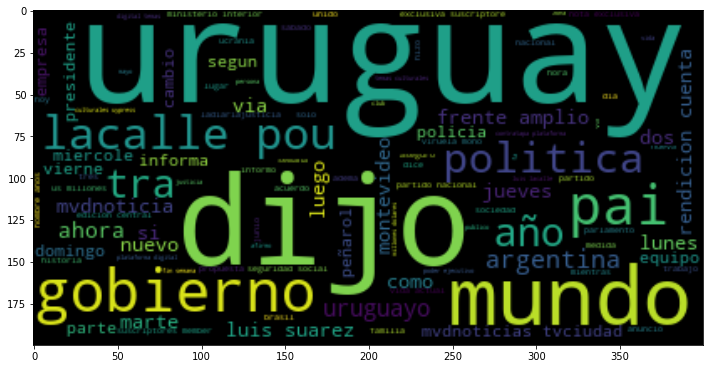

In [ ]:
# Let's see a wordcloud
text=' '.join(i for i in df_interim['text_clean'])
wordcloud=WordCloud(max_words=100).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [ ]:
df_interim.sample(60)

,text,date,medio,Is_Retweet,text_clean,mentions
8481,Cese de la emergencia sanitaria: los tapabocas no serán obligatorios y no habrá más aforos en lugares cerrados https://t.co/GTDAYLPpIW,2022-04-05 02:09:14,la_diaria,0,cese emergencia sanitaria tapabocas obligatorios aforos lugares cerrados,
16033,Moscú advirtió de consecuencias a Lituania por bloqueo a enclave de Kaliningrado https://t.co/32i2i833wv,2022-06-22 02:05:54,la_diaria,0,moscu advirtio consecuencias lituania bloqueo enclave kaliningrado,
4645,El libro muestra una mirada diferente sobre el impacto que la cárcel tiene sobre las mujeres y los niños que viven en la cárcel y busca rescatar aquello cálido y positivo que está siempre oculto a los ojos de todos de las mujeres presas.,2022-06-21 20:57:16,cinco,0,libro muestra mirada diferente impacto carcel mujeres niños viven carcel busca rescatar aquello calido positivo siempre oculto ojos mujeres presas,
43511,Cuáles son los cánceres más comunes en adolescentes y adultos jóvenes https://t.co/1g46unla9Z,2022-08-24 19:35:07,el_observador,0,cuales canceres comunes adolescentes adultos jovenes,
94962,Magistrados y abogados repudian amenazas a juezas que revocaron fallo del juez Recarey.\nhttps://t.co/ptqE2OLWah,2022-07-30 22:28:07,subrayado,0,magistrados abogados repudian amenazas juezas revocaron fallo juez recarey,
7706,Profesores brasileños relatan que las grabaciones de clases en línea han sido utilizadas para denunciarlos por “adoctrinamiento”. https://t.co/31pGgAKBDW,2022-03-27 14:44:07,la_diaria,0,profesores brasileños relatan grabaciones clases linea sido utilizadas denunciarlos adoctrinamiento,
14645,Colombia: Petro y Hernández aparecen muy parejos en las encuestas. https://t.co/l8NzWkaMrA,2022-06-08 19:15:10,la_diaria,0,colombia petro hernandez aparecen parejos encuestas,
95580,#AHORA | Policías llegan a Cerrito y Misiones para proceder a la desocupación de la sede central de Citibank en Ciudad Vieja que realiza AEBU. Informa @MaxiBorgesOk.,2022-08-11 19:44:05,subrayado,0,ahora policias llegan cerrito misiones proceder desocupacion sede central citibank ciudad vieja realiza aebu informa,@MaxiBorgesOk.
22853,#MVDNoticias \n\nEl @Minterioruy retoma la idea de promover los allanamientos nocturnos a través de una reforma constitucional que se pondría a consideración de la ciudadanía en las próximas elecciones nacionales de 2024. https://t.co/vWOcilbImW,2022-04-01 22:31:22,mvd,0,mvdnoticias retoma idea promover allanamientos nocturnos traves reforma constitucional pondria consideracion ciudadania proximas elecciones nacionales,@Minterioruy
106613,Los cirujanos pediátricos reclaman la creación de centros regionales para atender a niños del interior del país luego que los cirujanos de adultos decidieron dejar de operar a estos pacientes el pasado 1º de junio.\n\nhttps://t.co/HpNdppiuWp,2022-07-22 12:07:42,telenoche,0,cirujanos pediatricos reclaman creacion centros regionales atender niños interior pais luego cirujanos adultos decidieron dejar operar pacientes pasado º junio,


In [ ]:
df_interim['text_clean'].str.split(expand=True).stack().value_counts().tail(50)

proyectaron       1
shenyang          1
tergiversacion    1
apoyaria          1
beduino           1
sacrificar        1
recordarlas       1
acaso             1
subindices        1
ocasionandole     1
vuelca            1
manipulador       1
cassano           1
clarita           1
campuseros        1
wuzhou            1
mccurdy           1
unzue             1
maytel            1
ramodengui        1
sanidades         1
competidora       1
energumeno        1
jennette          1
orfanatos         1
nickelodeon       1
superdotado       1
topless           1
reflexionaran     1
rescinda          1
contanos          1
colocaba          1
forzosos          1
mortifero         1
louviere          1
eastern           1
aifa              1
aniston           1
comandada         1
encantadora       1
maggie            1
mons              1
volara            1
verheyen          1
damien            1
envolvio          1
siniestra         1
equinoccio        1
grange            1
xinjiang          1


In [ ]:
df_interim['text_clean']=df_interim['text_clean'].str.lstrip()

In [ ]:
df_interim = df_interim[df_interim['text_clean']!='']

**Lemmatization**

In [ ]:
sp_nlp = spacy.load("es_core_news_sm")

In [ ]:
def lemmatizer_txt(txt):
      try: 
        doc=sp_nlp(txt)
        lemmas = [tok.lemma_.lower() for tok in doc]
        lemmas = [w + " " for w in lemmas]
        return "".join(lemmas)
      except:
        return np.nan


In [ ]:
df_interim['text_clean_lemm'] = df_interim.text_clean.apply(lemmatizer_txt)

In [ ]:
df_interim.sample(10)

,text,date,medio,Is_Retweet,text_clean,mentions,text_clean_lemm
102644,Comenzó Teledía y estos son nuestros principales títulos:\n\n✅Densa niebla en gran parte del país\n✅Comparece Heber sobre homicidios y seguridad en el Parlamento\n✅Lacalle Pou dio positivo a Covid\n✅Fallecidos por Covid aumentaron la semana pasada\n✅Riogas presentó nueva propuesta https://t.co/kFj4Br1AJR,2022-06-07 15:29:49,telenoche,0,comenzo teledia principales titulos densa niebla gran parte pais comparece heber homicidios seguridad parlamento lacalle pou dio positivo covid fallecidos covid aumentaron semana pasada riogas presento nueva propuesta,,comenzo teledia principal titulo denso nieblar gran parte pais comparecer heber homicidio seguridad parlamento lacalle pou dar positivo covid fallecido covid aumentar semana pasado rioga presento nuevo propuesta
29925,Al no tener avances en las negociaciones ayer se movilizaron y esta tarde el consejo directivo del sindicato analiza nuevas medidas.,2022-08-05 16:50:55,mvd,0,tener avances negociaciones ayer movilizaron tarde consejo directivo sindicato analiza nuevas medidas,,tener avance negociación ayer movilizar tarde consejo directivo sindicato analizar nuevo medida
54586,Política | Bustillo transmitió a embajador turco el malestar del gobierno con gesto de su canciller https://t.co/GV4lL6CBhy https://t.co/7dk1g0v4E4,2022-04-26 02:24:10,el_pais,0,politica bustillo transmitio embajador turco malestar gobierno gesto canciller,,politico bustillo transmitio embajador turco malestar gobierno gesto canciller
42782,El danés Joachim Andersen reconoció que durante el partido molestó mucho a Darwin Núñez y que el uruguayo ya le había dado un cabezazo https://t.co/Fx4GCx26Ex,2022-08-16 12:38:42,el_observador,0,danes joachim andersen reconocio partido molesto darwin nuñez uruguayo dado cabezazo,,dán joachim andersir reconocio partido molesto darwin nuñez uruguayo dado cabezazo
45341,"Ricardo Bernardi: “De esta pandemia no salimos mejores, sino iguales” https://t.co/QLxXACs4Op https://t.co/LC6OzNt5rw",2022-03-27 07:12:06,el_pais,0,ricardo bernardi pandemia salimos mejores sino iguales,,ricardo bernardi pandemia salir mejor sino igual
76172,Facundo Pellistri y la razón por la cual tiene chance de quedarse en Manchester United https://t.co/DaQFdWWgpw,2022-07-12 20:37:02,el_pais,0,facundo pellistri razon chance quedarse manchester united,,facundo pellistri razon chance quedar él manchester united
82001,"Las levantará en el Mediterráneo, Asia-Pacífico, el Índico y el golfo Pérsico en el marco de la nueva doctrina naval aprobada por el presidente, Vladimir Putin. https://t.co/YVdxsit3By",2022-08-01 14:23:04,el_pais,0,levantara mediterraneo asiapacifico indico golfo persico marco nueva doctrina naval aprobada presidente vladimir putin,,levantar mediterraneo asiapacifico indico golfo persico marco nuevo doctrina naval aprobado presidente vladimir putin
81813,Cerro Largo - M.C. Torque: un partido con puntos de oro para la Tabla Anual https://t.co/GOeIkOtr6C,2022-07-31 16:57:02,el_pais,0,cerro largo mc torque partido puntos oro tabla anual,,cerro largo mc torque partido punto oro tabla anual
35508,"Los graves incidentes que comenzaron parciales de Peñarol, traerán consecuencias de una multa importante de Conmebol; ¿cuánto puede costarle este episodio de violencia a los aurinegros? Colón, por el encuentro de ida, debió abonar una cuantiosa suma https://t.co/Fr3USM60ic",2022-05-26 04:58:49,el_observador,0,graves incidentes comenzaron parciales peñarol traeran consecuencias multa importante conmebol cuanto puede costarle episodio violencia aurinegros colon encuentro ida debio abonar cuantiosa suma,,grave incidente comenzar parcial peñarol traeran consecuencia multa importante conmebol cuanto poder costar él episodio violenciir aurinegros colon encuentro ido debio abonar cuantioso sumar
28851,"#MVDNoticias por #TVCiudad\n\nCumbre del Mercosur\n\nMinistros de economía y cancilleres reunidos en Asunción, mañana se realiza cumbre presid

In [ ]:
# Save clean dataset

from google.colab import files

df_interim.to_csv('base_limpia.csv')
files.download('base_limpia.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>